In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Preprocessing Data

In [2]:

df = pd.read_csv("churndata.csv")  # باید ستون‌های ['text', 'label'] داشته باشه

In [3]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df = pd.read_csv("churndata.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID', axis=1, inplace=True)
df.head()
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\4092774589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\4092774589.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\4092774589.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [8]:
df.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000


### total charges = tenure * monthly charges

In [9]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\2708562854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\2708562854.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22292\2708562854.py:3: FutureWarning: Downcasting behavior in `replac

In [10]:
from sklearn.preprocessing import OneHotEncoder as ohe
ohe = ohe()
df['PaymentMethod'] = ohe.fit_transform(df[['PaymentMethod']]).toarray()
df['Contract'] = ohe.fit_transform(df[['Contract']]).toarray()


In [11]:
df['InternetService'] = ohe.fit_transform(df[['InternetService']]).toarray()
df['MultipleLines'] = ohe.fit_transform(df[['MultipleLines']]).toarray()


In [12]:
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['TechSupport'] = df['TechSupport'].astype(int)
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['TotalCharges'] = df['TotalCharges'].replace(' ', None).astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
df['tenure'] = df['tenure'].astype(int)

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   float64


In [15]:
corr_matrix = X_train.corr()

# تنظیم اندازه شکل
plt.figure(figsize=(10, 8))

# رسم heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# اضافه کردن عنوان
plt.title("Correlation Heatmap", fontsize=10)

# نمایش شکل
plt.show()

NameError: name 'X_train' is not defined

In [16]:
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# فرض: df دیتافریم اصلی با ستون 'Churn'

# جدا کردن کلاس‌ها
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]

# متعادل‌سازی: تعداد کلاس ۰ برابر با کلاس ۱
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)

# ترکیب کلاس‌ها
df = pd.concat([class_0_balanced, class_1])

# در هم زدن داده‌ها
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# جدا کردن ویژگی‌ها و هدف
X = df.drop('Churn', axis=1)
y = df['Churn']

# تقسیم داده به train/test (مثلاً 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [17]:
X_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)


In [18]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['InternetService', 'PhoneService']])
X_pca_test = pca.transform(X_test[['InternetService', 'PhoneService']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['Ps1', 'Ps2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['Ps1', 'Ps2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['InternetService', 'PhoneService'])
X_test = X_test.drop(columns=['InternetService', 'PhoneService'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)

In [19]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['OnlineSecurity', 'MonthlyCharges']])
X_pca_test = pca.transform(X_test[['OnlineSecurity', 'MonthlyCharges']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['Pt1', 'Pt2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['Pt1', 'Pt2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['OnlineSecurity', 'MonthlyCharges'])
X_test = X_test.drop(columns=['OnlineSecurity', 'MonthlyCharges'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)

In [20]:
# اجرای PCA فقط روی دو ستون خاص
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train[['tenure', 'TotalCharges']])
X_pca_test = pca.transform(X_test[['tenure', 'TotalCharges']])

# تبدیل به دیتافریم و دادن نام به ستون‌ها
import pandas as pd
X_pca_train = pd.DataFrame(X_pca_train, columns=['PC1', 'PC2'], index=X_train.index)
X_pca_test = pd.DataFrame(X_pca_test, columns=['PC1', 'PC2'], index=X_test.index)

# حذف ستون‌های اولیه از دیتاست اصلی (اختیاری)
X_train = X_train.drop(columns=['tenure', 'TotalCharges'])
X_test = X_test.drop(columns=['tenure', 'TotalCharges'])

# الحاق مؤلفه‌های PCA به دیتاست
X_train = pd.concat([X_train, X_pca_train], axis=1)
X_test = pd.concat([X_test, X_pca_test], axis=1)


## Modelling churn

In [30]:
import optuna
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings

warnings.filterwarnings("ignore")


def objective(trial, X_train, X_test, y_train, y_test):
    rf_n = trial.suggest_int("rf_n_estimators", 50, 200)
    rf_depth = trial.suggest_int("rf_max_depth", 3, 20)

    xgb_n = trial.suggest_int("xgb_n_estimators", 50, 200)
    xgb_depth = trial.suggest_int("xgb_max_depth", 3, 10)

    lgb_n = trial.suggest_int("lgb_n_estimators", 50, 200)
    lgb_depth = trial.suggest_int("lgb_max_depth", 3, 20)
    lgb_lr = trial.suggest_float("lgb_learning_rate", 0.01, 0.3, log=True)

    lr_C = trial.suggest_float("lr_C", 1e-3, 10, log=True)

    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    estimators = [
        ('rf', RandomForestClassifier(
            n_estimators=rf_n,
            max_depth=rf_depth,
            class_weight={0: 1, 1: 3
    },
            random_state=42
        )),
        ('xgb', XGBClassifier(
            n_estimators=xgb_n,
            max_depth=xgb_depth,
            scale_pos_weight=3
    ,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )),
        ('lgb', LGBMClassifier(
            n_estimators=lgb_n,
            max_depth=lgb_depth,
            learning_rate=lgb_lr,
            class_weight={0: 1, 1: 3
    },
            random_state=42
        ))
    ]

    final_estimator = LogisticRegression(
        C=lr_C,
        max_iter=500,
        class_weight={0: 1, 1: 3
},
        random_state=42
    )

    model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator,
        cv=3,
        n_jobs=-1
    )

    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1


# فرض بر این است که X_train, X_test, y_train, y_test از قبل تعریف شده‌اند
# اگر لازم داری همون‌جا تعریفشون کنم، اطلاع بده

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, X_test, y_train, y_test), n_trials=30)

print("✅ بهترین پارامترها:", study.best_params)

best = study.best_params

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=best['rf_n_estimators'],
        max_depth=best['rf_max_depth'],
        class_weight={0: 1, 1: 3
},
        random_state=42
    )),
    ('xgb', XGBClassifier(
        n_estimators=best['xgb_n_estimators'],
        max_depth=best['xgb_max_depth'],
        scale_pos_weight=3
,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )),
    ('lgb', LGBMClassifier(
        n_estimators=best['lgb_n_estimators'],
        max_depth=best['lgb_max_depth'],
        learning_rate=best['lgb_learning_rate'],
        class_weight={0: 1, 1: 3
},
        random_state=42
    ))
]

final_estimator = LogisticRegression(
    C=best['lr_C'],
    max_iter=500,
    class_weight={0: 1, 1: 3},
    random_state=42
)

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_resampled, y_resampled)
y_pred_final = stacking_clf.predict(X_test)

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final, digits=4))


[I 2025-06-25 08:54:14,219] A new study created in memory with name: no-name-05e2922c-6655-47f7-a861-2c2cf9676b32
[I 2025-06-25 08:54:15,217] Trial 0 finished with value: 0.781038374717833 and parameters: {'rf_n_estimators': 97, 'rf_max_depth': 18, 'xgb_n_estimators': 82, 'xgb_max_depth': 9, 'lgb_n_estimators': 119, 'lgb_max_depth': 17, 'lgb_learning_rate': 0.12250776362606675, 'lr_C': 3.1354749040400938}. Best is trial 0 with value: 0.781038374717833.
[I 2025-06-25 08:54:16,605] Trial 1 finished with value: 0.7838745800671892 and parameters: {'rf_n_estimators': 151, 'rf_max_depth': 17, 'xgb_n_estimators': 152, 'xgb_max_depth': 10, 'lgb_n_estimators': 109, 'lgb_max_depth': 18, 'lgb_learning_rate': 0.040572929403181864, 'lr_C': 2.179929558099548}. Best is trial 1 with value: 0.7838745800671892.
[I 2025-06-25 08:54:17,787] Trial 2 finished with value: 0.7903402854006586 and parameters: {'rf_n_estimators': 148, 'rf_max_depth': 8, 'xgb_n_estimators': 80, 'xgb_max_depth': 8, 'lgb_n_estimato

✅ بهترین پارامترها: {'rf_n_estimators': 74, 'rf_max_depth': 5, 'xgb_n_estimators': 97, 'xgb_max_depth': 4, 'lgb_n_estimators': 145, 'lgb_max_depth': 19, 'lgb_learning_rate': 0.0876119437628737, 'lr_C': 0.6883300753501085}

📊 Confusion Matrix:
[[205 169]
 [ 18 356]]

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9193    0.5481    0.6868       374
           1     0.6781    0.9519    0.7920       374

    accuracy                         0.7500       748
   macro avg     0.7987    0.7500    0.7394       748
weighted avg     0.7987    0.7500    0.7394       748



In [31]:
print(X_train.columns)
print(X_test.columns)
print(X_res.columns)



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Ps1', 'Ps2', 'Pt1', 'Pt2', 'PC1', 'PC2'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Ps1', 'Ps2', 'Pt1', 'Pt2', 'PC1', 'PC2'],
      dtype='object')


NameError: name 'X_res' is not defined

In [32]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Ps1,Ps2,Pt1,Pt2,PC1,PC2
2681,0,1,0,0,0.0,1,1,0,1,1,1.0,1,0.0,-0.140002,0.0,0.608510,-0.474446,7.210378,0.800787
646,1,0,1,1,1.0,0,1,1,1,1,0.0,0,1.0,-0.140002,0.0,0.608510,-0.474446,11.210344,0.784335
1687,1,1,1,0,1.0,0,0,0,0,0,0.0,1,0.0,-0.140002,0.0,-0.667169,0.135999,-26.793447,-0.059369
1458,1,1,1,0,0.0,1,0,0,1,1,1.0,1,0.0,-0.140002,0.0,-0.667169,0.135999,-15.793540,-0.104610
1630,1,0,0,0,1.0,2,2,2,2,2,0.0,0,0.0,-0.140002,0.0,1.218955,0.801233,-26.793447,-0.059369


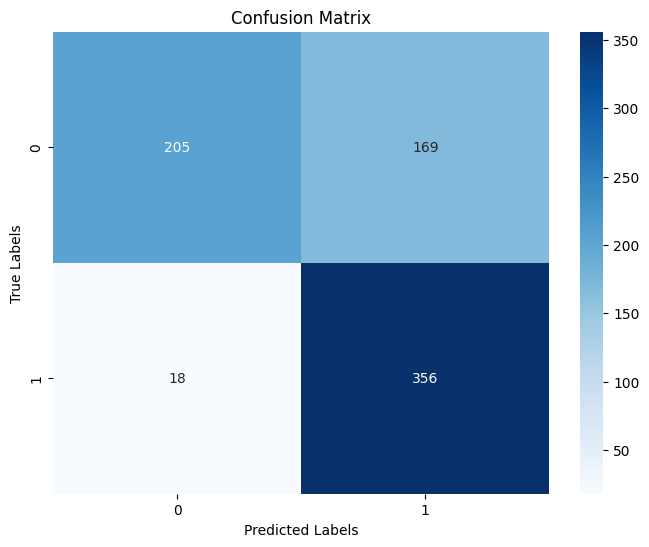

In [33]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

'confusion_matrix_churn.png'

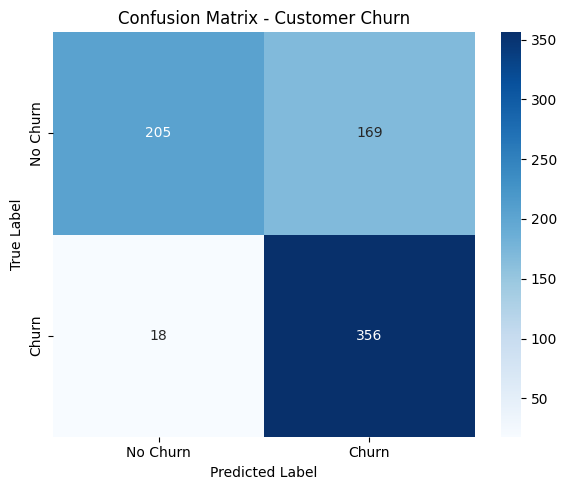

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Customer Churn')
plt.tight_layout()

# Save to file
output_path = "confusion_matrix_churn.png"
plt.savefig(output_path)
output_path

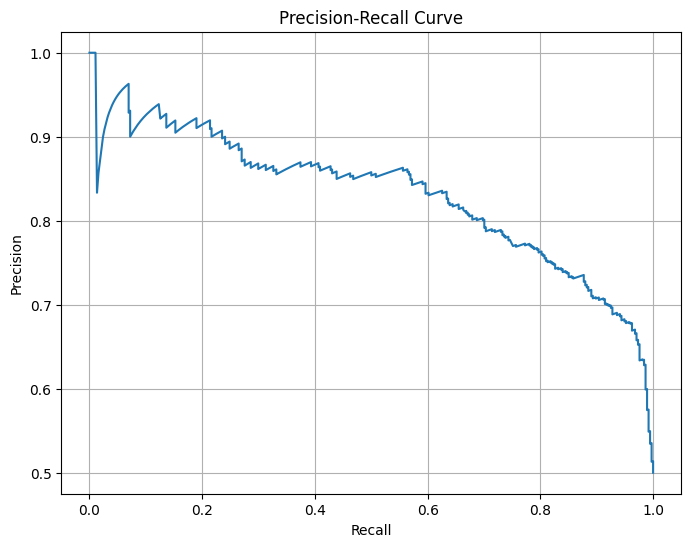

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# پیش‌بینی احتمال برای کلاس مثبت (label=1)
y_scores = stacking_clf.predict_proba(X_test)[:, 1]

# محاسبه precision و recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


✅ Best Threshold: 0.696
📈 Best F1 Score: 0.800


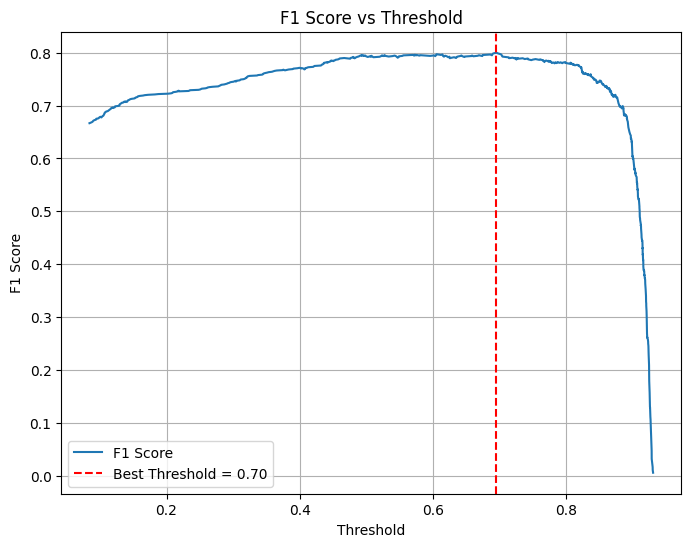

In [35]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt

# احتمال‌ها برای کلاس 1
y_scores = stacking_clf.predict_proba(X_test)[:, 1]

# محاسبه precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# محاسبه F1 برای هر threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# پیدا کردن بهترین threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"✅ Best Threshold: {best_threshold:.3f}")
print(f"📈 Best F1 Score: {best_f1:.3f}")

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
y_pred_custom = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.85      0.68      0.76       374
           1       0.74      0.88      0.80       374

    accuracy                           0.78       748
   macro avg       0.79      0.78      0.78       748
weighted avg       0.79      0.78      0.78       748



In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_custom)


array([[256, 118],
       [ 46, 328]])